In [2]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import copy

### Using the South German Credit (UPDATE) Data Set
Dataset Link : https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29

In [20]:
df = pd.read_csv("./SouthGermanCredit/SouthGermanCredit.csv")

In [4]:
df.head(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
1,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
2,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   997 non-null    int64
 1   duration                 997 non-null    int64
 2   credit_history           997 non-null    int64
 3   purpose                  997 non-null    int64
 4   amount                   997 non-null    int64
 5   savings                  997 non-null    int64
 6   employment_duration      997 non-null    int64
 7   installment_rate         997 non-null    int64
 8   personal_status_sex      997 non-null    int64
 9   other_debtors            997 non-null    int64
 10  present_residence        997 non-null    int64
 11  property                 997 non-null    int64
 12  age                      997 non-null    int64
 13  other_installment_plans  997 non-null    int64
 14  housing                  997 non-null    int64
 15  number

### Visualization

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_vis = copy.deepcopy(df)

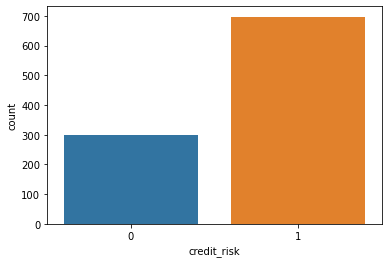

In [9]:
sns.countplot(x="credit_risk",data=df_vis)
plt.show()

<AxesSubplot:>

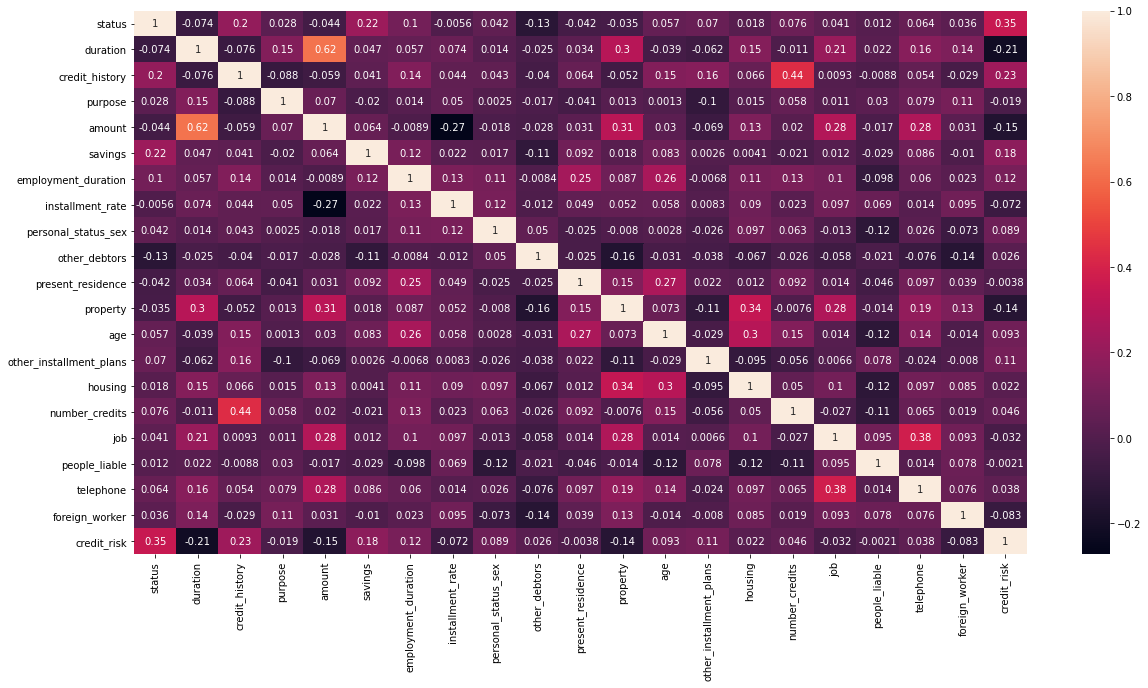

In [10]:
# using heatmap to plot the correlation data

plt.figure(figsize=(20,10)) # making the plot wider
sns.heatmap(df_vis.corr(),annot=True)

In [11]:
df_vis.corr()['credit_risk'].sort_values(key= lambda x: abs(x))

people_liable             -0.002051
present_residence         -0.003847
purpose                   -0.018651
housing                    0.021683
other_debtors              0.025755
job                       -0.032071
telephone                  0.038152
number_credits             0.046061
installment_rate          -0.071996
foreign_worker            -0.082524
personal_status_sex        0.089304
age                        0.093006
other_installment_plans    0.109041
employment_duration        0.116802
property                  -0.141025
amount                    -0.153754
savings                    0.180110
duration                  -0.213942
credit_history             0.227939
status                     0.353620
credit_risk                1.000000
Name: credit_risk, dtype: float64

## Train using AutoML

In [13]:
import h2o
from h2o.automl import H2OAutoML

In [14]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,52 mins 42 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_quin_ybm1vw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.100 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [21]:
df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [22]:
# Reponse column
y = "credit_risk"

In [23]:
# Split into train & test
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [24]:
# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


## Explainability

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_AutoML_20210718_110121,0.16011,0.400137,0.16011,0.320211,0.279495,132,0.034748,StackedEnsemble
XRT_1_AutoML_20210718_110121,0.160949,0.401185,0.160949,0.331074,0.281134,135,0.010988,DRF
GBM_grid__1_AutoML_20210718_110121_model_7,0.161797,0.402241,0.161797,0.325937,0.281503,46,0.00687,GBM
StackedEnsemble_AllModels_AutoML_20210718_110121,0.162843,0.403538,0.162843,0.334527,0.28347,137,0.033682,StackedEnsemble
DRF_1_AutoML_20210718_110121,0.163044,0.403787,0.163044,0.32498,0.281709,177,0.012643,DRF
GBM_grid__1_AutoML_20210718_110121_model_5,0.16384,0.404772,0.16384,0.33048,0.282559,58,0.00658,GBM
XGBoost_grid__1_AutoML_20210718_110121_model_16,0.164086,0.405075,0.164086,0.323294,0.281451,134,0.003702,XGBoost
GBM_2_AutoML_20210718_110121,0.164405,0.405468,0.164405,0.320619,0.282786,65,0.008492,GBM
GBM_3_AutoML_20210718_110121,0.165025,0.406233,0.165025,0.321012,0.282755,62,0.007969,GBM
GBM_grid__1_AutoML_20210718_110121_model_1,0.165702,0.407065,0.165702,0.334688,0.285644,48,0.005082,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

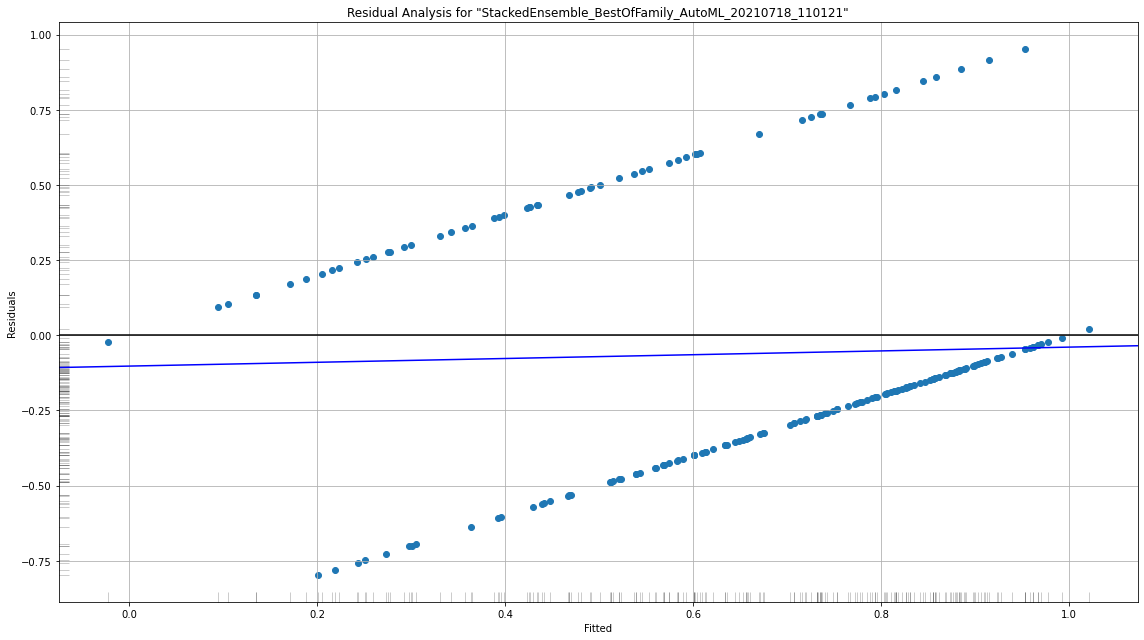

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

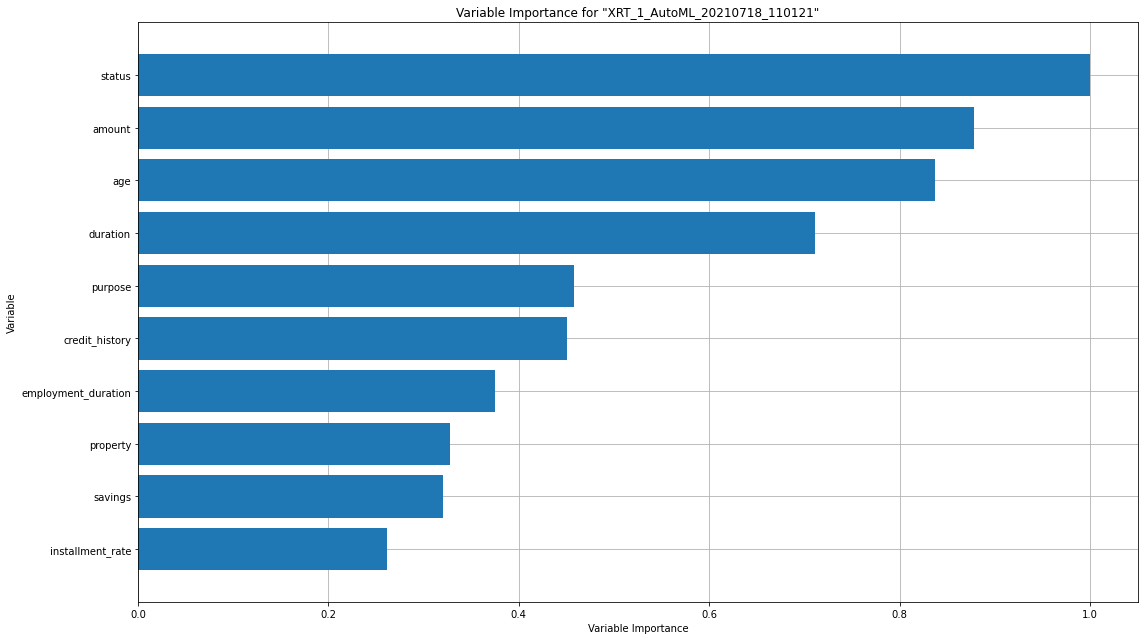

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

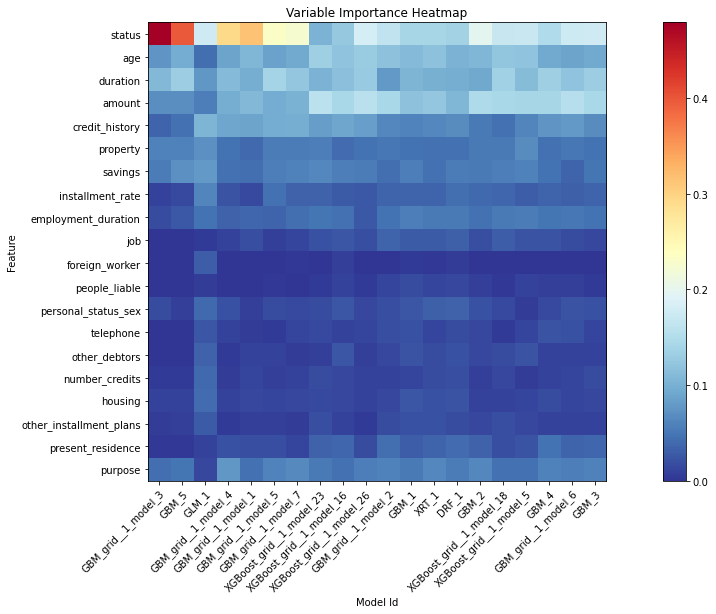

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

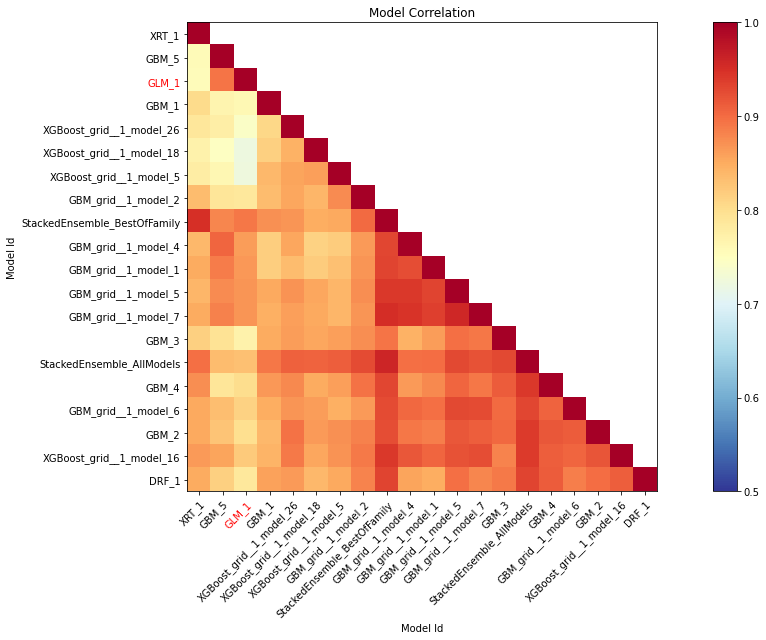

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

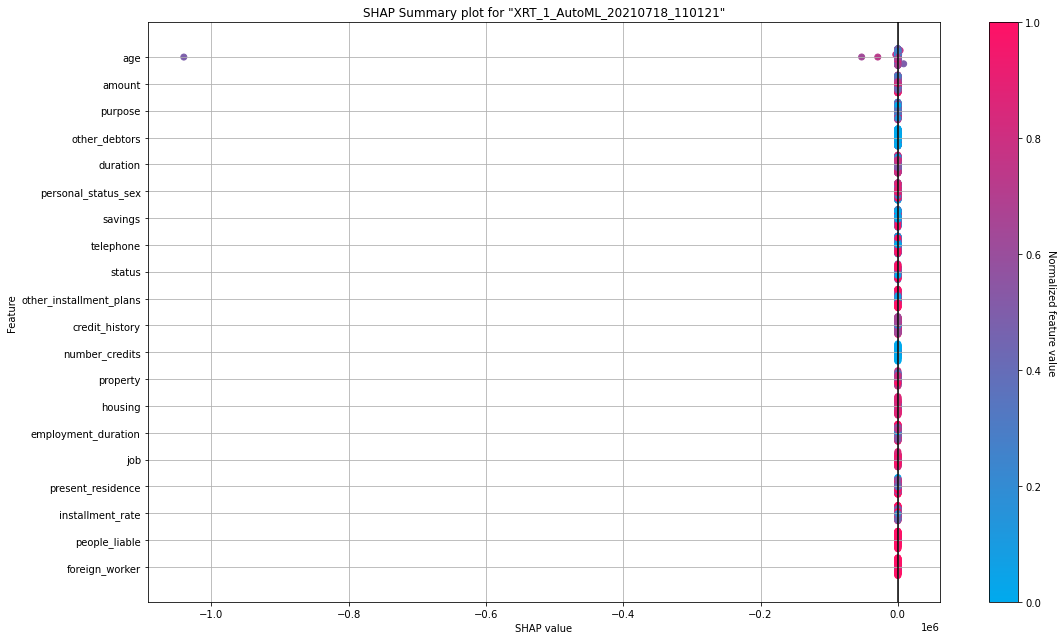

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

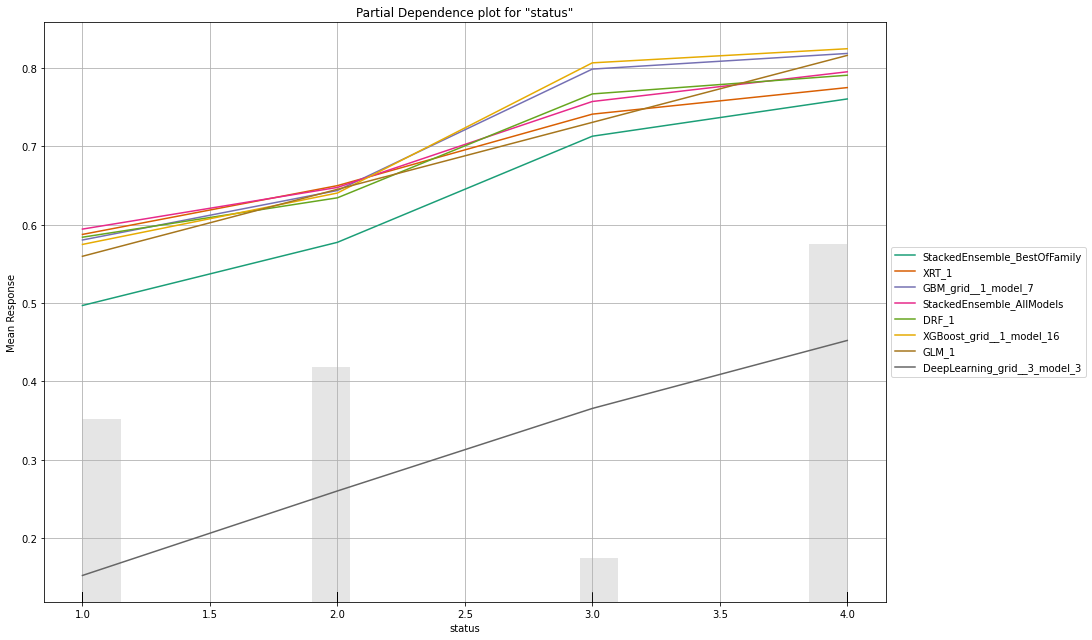

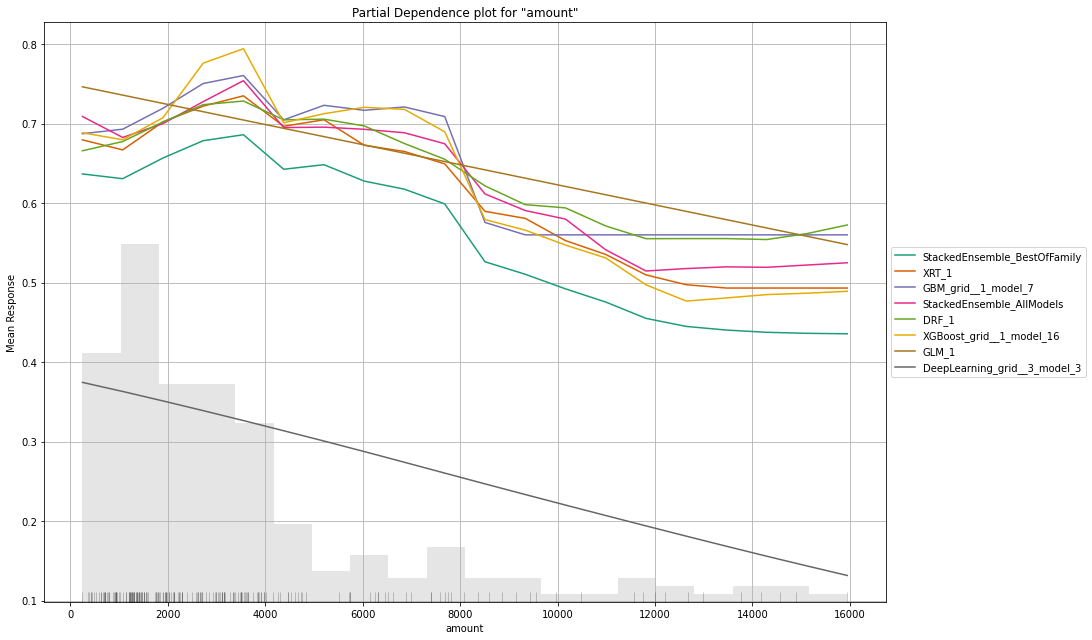

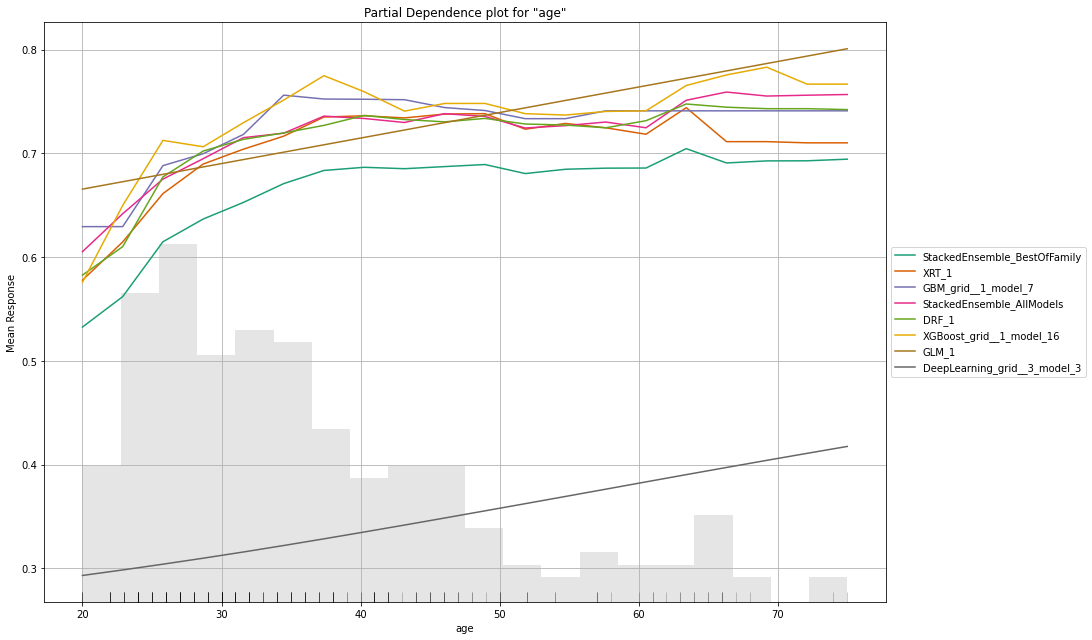

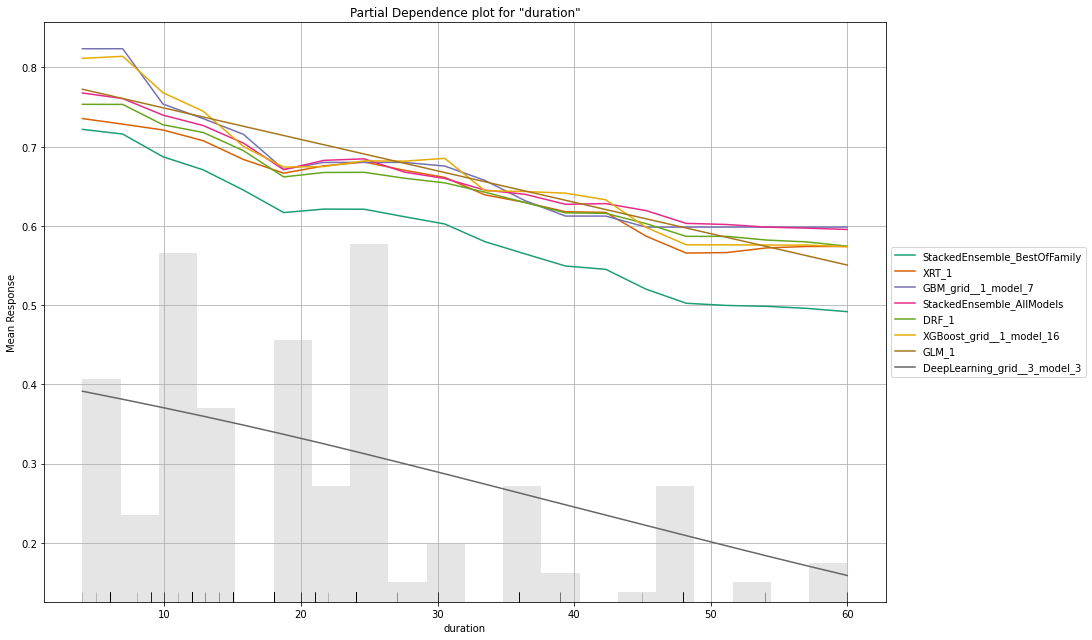

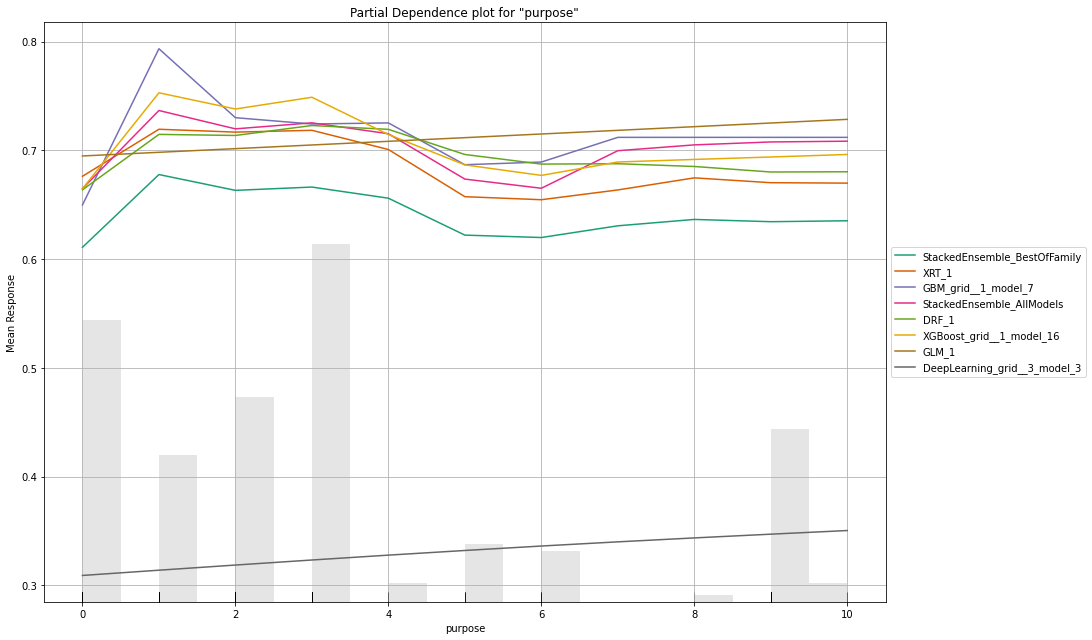

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

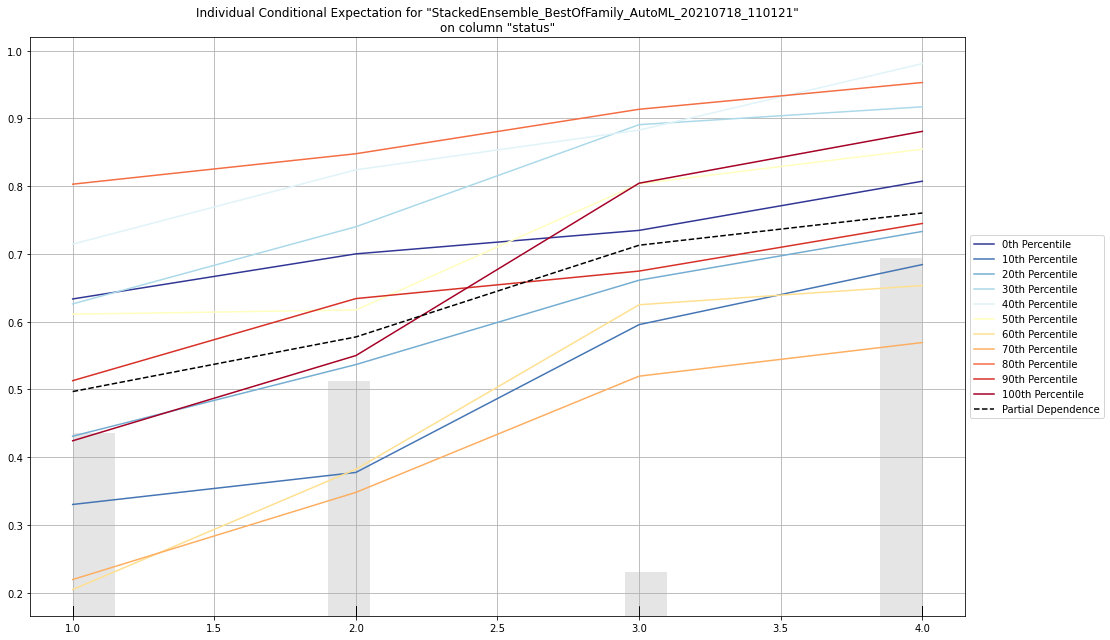

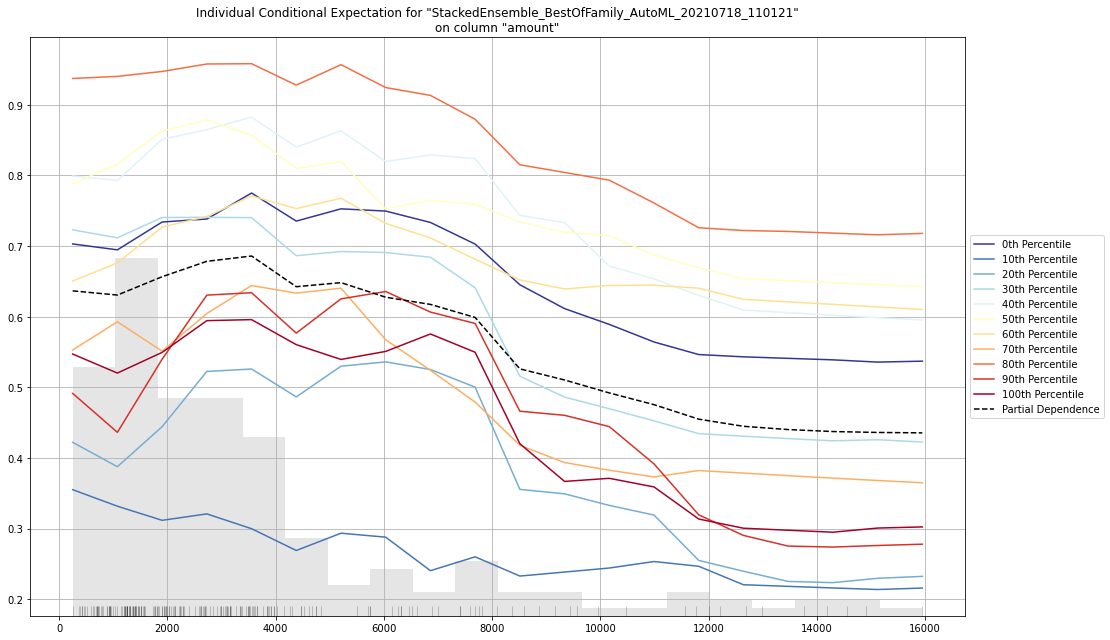

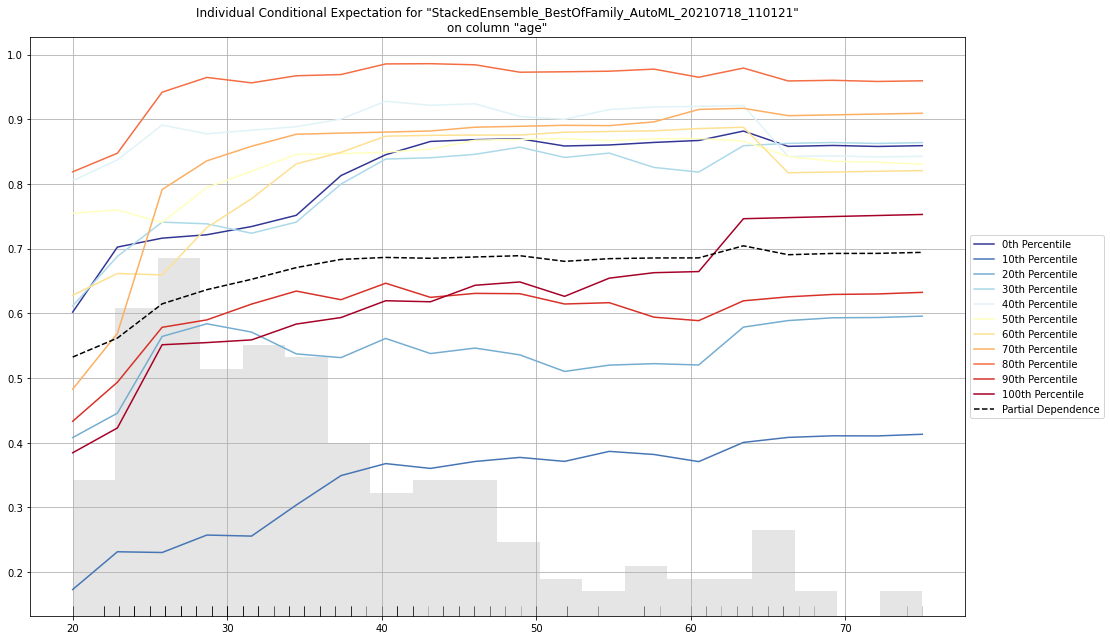

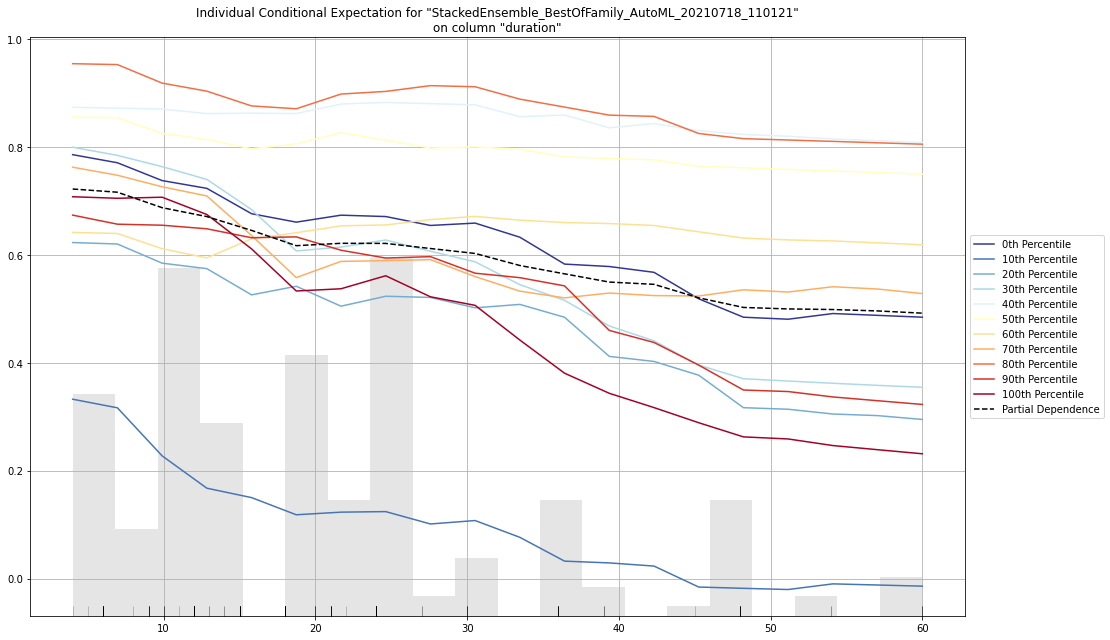

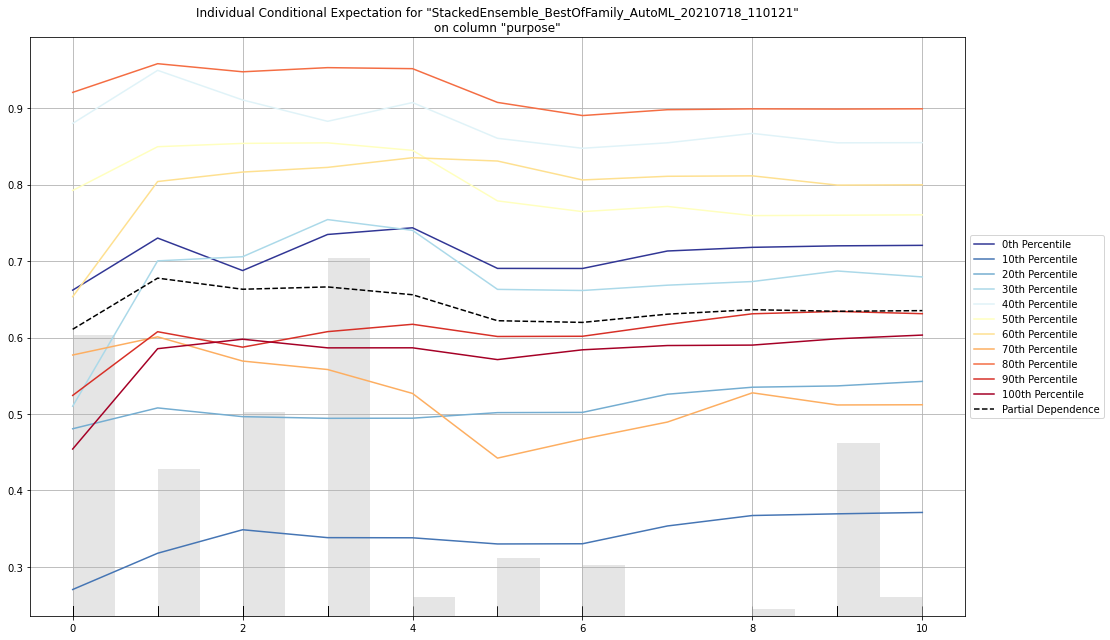

In [25]:
# Explain leader model & compare with all AutoML models
exa = aml.explain(test)